In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import json
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoardDisplay as gbd

from scipy import stats


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mplTicker
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [3]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
# strategies = [Strategies.RandomStrategy,
#               Strategies.MoveFirstStrategy,
#               Strategies.MoveLastStrategy]
strategies = [Strategies.MoveFirstStrategy]
p0 = Player(0,7,mls)
p1 = Player(1, 7, mfs)
p2 = Player(2, 7, rs)
# p3 = Player(3, 4, rs)
md2 = Dice.MultiD2Dice(4)
d4 = Dice.D4()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs0 = GameSettings([p0, p1], md2, 4, 8, 2, [8], [4, 8, 13])
gs1 = GameSettings([p1, p2], md2, 4, 8, 2, [8], [4, 8, 13])
# gs = [gs0,gs1]

    
# gs = [GameSettings([Player(0, 7, s0()), Player(1, 7, s1())],
#                    Dice.MultiD2Dice(4), 14, 0, 0, [], []) for s1 in strategies for s0 in strategies]


gs = [GameSettings([Player(0, 7, Strategies.RandomStrategy()), Player(1, 7, Strategies.ScoreThrowOpponentStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [8], [4, 8, 13]),
      # GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [], []),
      # GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [8], [4,8,13]),
]

# gs = [GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(4), 4, 8, 2, [8], [4,8,13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2Dice(3), 4, 8, 2, [8], [4, 8, 13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.MultiD2DiceNo0(3), 4, 8, 2, [8], [4, 8, 13]),
#       GameSettings([Player(0, 7, Strategies.MoveFirstStrategy()), Player(1, 7, Strategies.MoveFirstStrategy())], Dice.D4(), 4, 8, 2, [8], [4, 8, 13]),
# ]


In [4]:
g = GameUr(gs[0])
g.getStonesHistory(False)
g.run(2)
# with open('history.json',"w") as f:
#     json.dump(g.getStonesHistory(),f)

g.getStonesHistory(False)


{'winner': [],
 'gameLength': 3,
 'history': {'stones': {'p0': {'p0s0': [0, 2, 2, 2, 2],
    'p0s1': [0, 0, 0, 0, 0],
    'p0s2': [0, 0, 0, 4, 4],
    'p0s3': [0, 0, 0, 0, 0],
    'p0s4': [0, 0, 0, 0, 0],
    'p0s5': [0, 0, 0, 0, 0],
    'p0s6': [0, 0, 0, 0, 0]},
   'p1': {'p1s0': [0, 0, 1, 1, 4],
    'p1s1': [0, 0, 0, 0, 0],
    'p1s2': [0, 0, 0, 0, 0],
    'p1s3': [0, 0, 0, 0, 0],
    'p1s4': [0, 0, 0, 0, 0],
    'p1s5': [0, 0, 0, 0, 0],
    'p1s6': [0, 0, 0, 0, 0]}},
  'roundID': [0, 1, 1, 2, 2],
  'activePlayer': [None, 'p0', 'p1', 'p0', 'p1'],
  'diceRoll': [-1, 2, 1, 4, 3],
  'moveDist': [-1, 2, 1, 4, 3],
  'newRound': [True, True, False, True, False],
  'globalStepID': [0, 1, 2, 3, 4]},
 'players': [Player: id:0, strategy:random, stones:p0s0,p0s1,p0s2,p0s3,p0s4,p0s5,p0s6,
  Player: id:1, strategy:Score_DR, stones:p1s0,p1s1,p1s2,p1s3,p1s4,p1s5,p1s6],
 'dice': <src.gameSimulation.Dice.MultiD2Dice at 0x28b2e00e500>,
 'gameSettings': <src.gameSimulation.GameSettings.GameSettings at 

In [5]:
h=Multirun.multirun(1000,1,gs,False) 

chunks: 1000
gamePerChunk: 1
gamesettings: 1


100%|██████████| 1000/1000 [00:06<00:00, 150.40games/s]


In [8]:

gl = [[x["gameLength"] for x in h_["history"]] for h_ in h]
gl
# h[0]["history"]

[[57,
  64,
  52,
  53,
  55,
  45,
  59,
  54,
  54,
  58,
  52,
  48,
  49,
  56,
  53,
  46,
  54,
  56,
  50,
  55,
  56,
  55,
  52,
  50,
  53,
  55,
  52,
  59,
  47,
  49,
  51,
  50,
  48,
  57,
  55,
  63,
  57,
  57,
  55,
  49,
  57,
  51,
  59,
  51,
  55,
  58,
  58,
  55,
  52,
  48,
  48,
  50,
  61,
  55,
  54,
  49,
  56,
  60,
  52,
  52,
  50,
  57,
  58,
  55,
  55,
  55,
  60,
  54,
  53,
  52,
  52,
  57,
  54,
  54,
  51,
  58,
  50,
  56,
  54,
  59,
  58,
  57,
  51,
  50,
  55,
  52,
  52,
  58,
  54,
  63,
  53,
  52,
  51,
  59,
  54,
  52,
  48,
  53,
  54,
  52,
  54,
  51,
  57,
  51,
  54,
  54,
  52,
  54,
  54,
  55,
  52,
  61,
  51,
  54,
  62,
  52,
  56,
  53,
  51,
  54,
  52,
  54,
  59,
  48,
  54,
  55,
  57,
  52,
  53,
  50,
  55,
  57,
  54,
  55,
  52,
  54,
  55,
  59,
  51,
  56,
  53,
  55,
  49,
  60,
  57,
  55,
  50,
  53,
  55,
  55,
  55,
  56,
  55,
  54,
  59,
  55,
  50,
  54,
  51,
  50,
  62,
  53,
  64,
  51,
  53,
  53,
  58

In [9]:
gl = [[x["gameLength"] for x in h_["history"]] for h_ in h]
gl_stacked = [[(i,gl_.count(i)) for i in range(np.min(gl_),np.max(gl_)+1)] for gl_ in gl]

gl_stacked
# np.average(gl)
# np.min(gl)
# np.max(gl)


[[(44, 2),
  (45, 2),
  (46, 1),
  (47, 9),
  (48, 20),
  (49, 31),
  (50, 61),
  (51, 97),
  (52, 118),
  (53, 102),
  (54, 102),
  (55, 109),
  (56, 89),
  (57, 74),
  (58, 58),
  (59, 46),
  (60, 33),
  (61, 15),
  (62, 10),
  (63, 9),
  (64, 5),
  (65, 2),
  (66, 2),
  (67, 1),
  (68, 2)]]

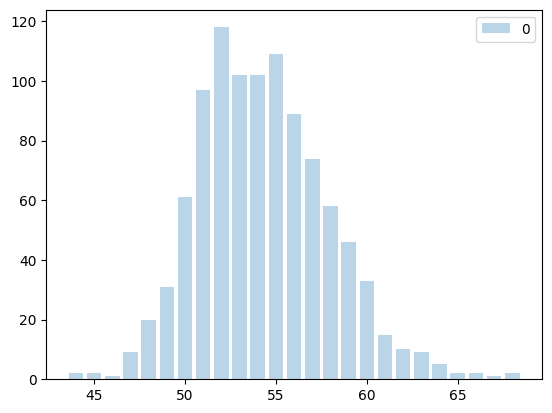

In [10]:
for i,gl_stacked_ in enumerate(gl_stacked):
        plt.bar([x for x, _ in gl_stacked_], [
                y for _, y in gl_stacked_], alpha=0.3, label=i)
plt.legend()

In [11]:
[{"strats":[s.getName() for s in gs[i].getStrategies()],"min":np.min(gl_),"median":np.median(gl_),"avg":np.average(gl_),"max":np.max(gl_)} for i,gl_ in enumerate(gl)]

[{'strats': ['random', 'Score_DR'],
  'min': 44,
  'median': 54.0,
  'avg': 54.315,
  'max': 68}]

In [12]:

interestingGames= [{"min": gl_.index(np.min(gl_)),
#  "median": gl_.index( np.median(gl_)), 
 "max": gl_.index(np.max(gl_))} for gl_ in gl]
interestingGames


[{'min': 414, 'max': 381}]

In [28]:

def drawGame(currGame,gs:GameSettings, singleGraph=False, showDiceRoll=True, showProgress=True):
    stepWidth = 0.2
    stepLineOcc = 0.1

    roundsLabels = [currGame["history"]["roundID"][i] if nR else ""  for i,nR in enumerate(currGame["history"]["newRound"])]

    

    if singleGraph:
        graphcount = 1+showDiceRoll+showProgress
    else:
        graphcount = len(currGame["history"]["stones"])+showDiceRoll + showProgress
    
    stepcount = np.max(currGame["history"]["globalStepID"])
    height_ratios = [3]*(graphcount-(showDiceRoll + showProgress)
                         )+[1]*(showDiceRoll + showProgress)

    fig, ax = plt.subplots(nrows=graphcount, sharex=True, figsize=[
        stepWidth*stepcount, 3*graphcount], gridspec_kw={'height_ratios': height_ratios})
    fig.subplots_adjust(hspace=0)


    for a in ax[:-2]:
        
        gbd.makeGameboardDisplay( a, *list(gs.getFieldsSettings().values()), xoff=2)
        a.set_yticks(range(0, 16), ["start"]+list(range(1, 15))+["end"])
        for drf in gs.getDoubleRollFields():
            a.axhline(drf, color=(0, 0, 0, 0.3),  ls='--')

    for a in ax:
        for i, ap in enumerate(currGame["history"]["activePlayer"]):
            if ap == "p0":
                facecolor = '#ff0000'
            elif ap == "p1":
                facecolor = '#0000ff'
            else:
                continue
            a.axvspan(i-0.5, i+0.5, facecolor=facecolor, alpha=stepLineOcc)

    ax[0].set_xlabel('step')
    secax = ax[0].secondary_xaxis('top')
    secax.set_xlabel('round')
    secax.set_xticks(currGame["history"]["globalStepID"], roundsLabels,
                        color=(0.1, 0.1, 0.1, 0.8))




    # norm = mpl.colors.Normalize(vmin=min_step_count, vmax=max_step_count)
    stonecount=7
    my_colors = [np.array([np.linspace(.5, 1, stonecount), np.linspace(0, 0, stonecount),
                           np.linspace(0, 0.3, stonecount), np.linspace(0.8, .8, stonecount)]).reshape(4, -1).T,
                 np.array([np.linspace(0, 0, stonecount), np.linspace(0.5, 1, stonecount),
                           np.linspace(0, 0.3, stonecount), np.linspace(0.8, .8, stonecount)]).reshape(4, -1).T]
    
    for i, p in enumerate(currGame["history"]["stones"]):
        playerStones = currGame["history"]["stones"][p]
        for j,s in enumerate(playerStones):
            if singleGraph:
                axesID = 0
            else:
                axesID = i
            ax[axesID].plot(currGame["history"]["globalStepID"],
                    playerStones[s], marker='.', label=s, color=my_colors[i][j])
    
    if showProgress:
        playerProgress = {p: [np.sum([currGame["history"]["stones"][p][stone][step]for stone in currGame["history"]["stones"][p]])/(15*7)
                            for step in currGame["history"]["globalStepID"]]for p in currGame["history"]["stones"]}
        for p in playerProgress:
            ax[-(showDiceRoll + showProgress)].plot(currGame["history"]
                                                    ["globalStepID"], playerProgress[p], label=p)
    
    if showDiceRoll:
        ax[-1].bar(currGame["history"]["globalStepID"],
                currGame["history"]["diceRoll"],alpha=0.5, label="diceRoll")
        ax[-1].bar(currGame["history"]["globalStepID"],
                currGame["history"]["moveDist"], alpha=0.5, label="moveDist")

    for a in ax[:-(showDiceRoll + showProgress)]:
        a.axis('equal')
        a.set_xbound(-1, 16)
        a.legend(bbox_to_anchor=(1, 1),
                 loc='upper left', borderaxespad=0.)
    for a in ax:
        # a.grid("y")
        a.set_xbound(-4, stepcount+1)

    if showDiceRoll:
        ax[-1].set_ybound(0,5)
        ax[-1].set_ylim(0,5)
        ax[-1].legend(bbox_to_anchor=(1, 1),
                    loc='upper left', borderaxespad=0.)
    if showProgress:
        ax[-(showDiceRoll + showProgress)].legend(title=" Spielfortschritt", bbox_to_anchor=(1, 1),
                    loc='upper left', borderaxespad=0.)

    divider = make_axes_locatable(ax[-1])
    # axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax[-1])
    # axHisty.hist(currGame["history"]["diceRoll"],orientation='horizontal')
    # axHisty.hist(currGame["history"]["moveDist"],orientation='horizontal')
    # currGame["history"]["roundID"]
    # fig.tight_layout()



In [32]:
lengthCase = "min"
historyID = 0
currGame = h[historyID]["history"][interestingGames[historyID][lengthCase]]
gs = h[historyID]["gs"]
# drawGame(currGame, True,False,True)
gs.getFieldsSettings()

{'prepareLength': 14,
 'fightLength': 0,
 'retreatLength': 0,
 'fightSaveFields': [],
 'doubleRollFields': []}

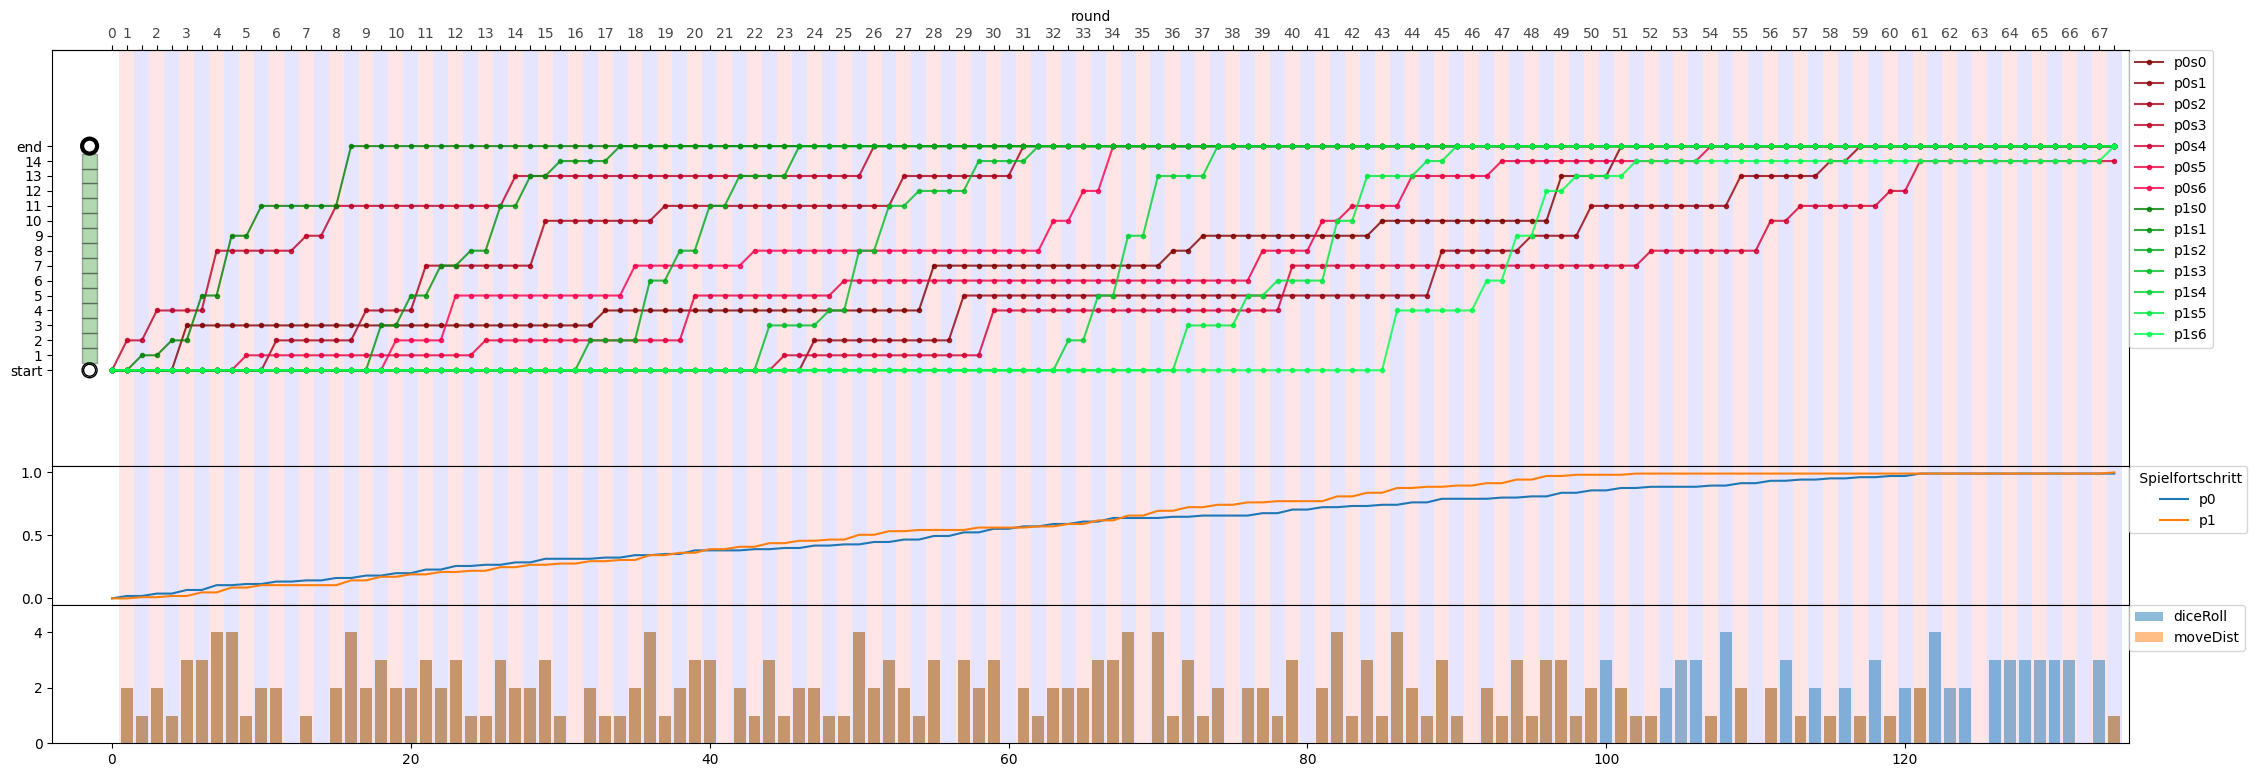

In [18]:
lengthCase = "max"
historyID = 0
currGame = h[historyID]["history"][interestingGames[historyID][lengthCase]]
drawGame(currGame, True)


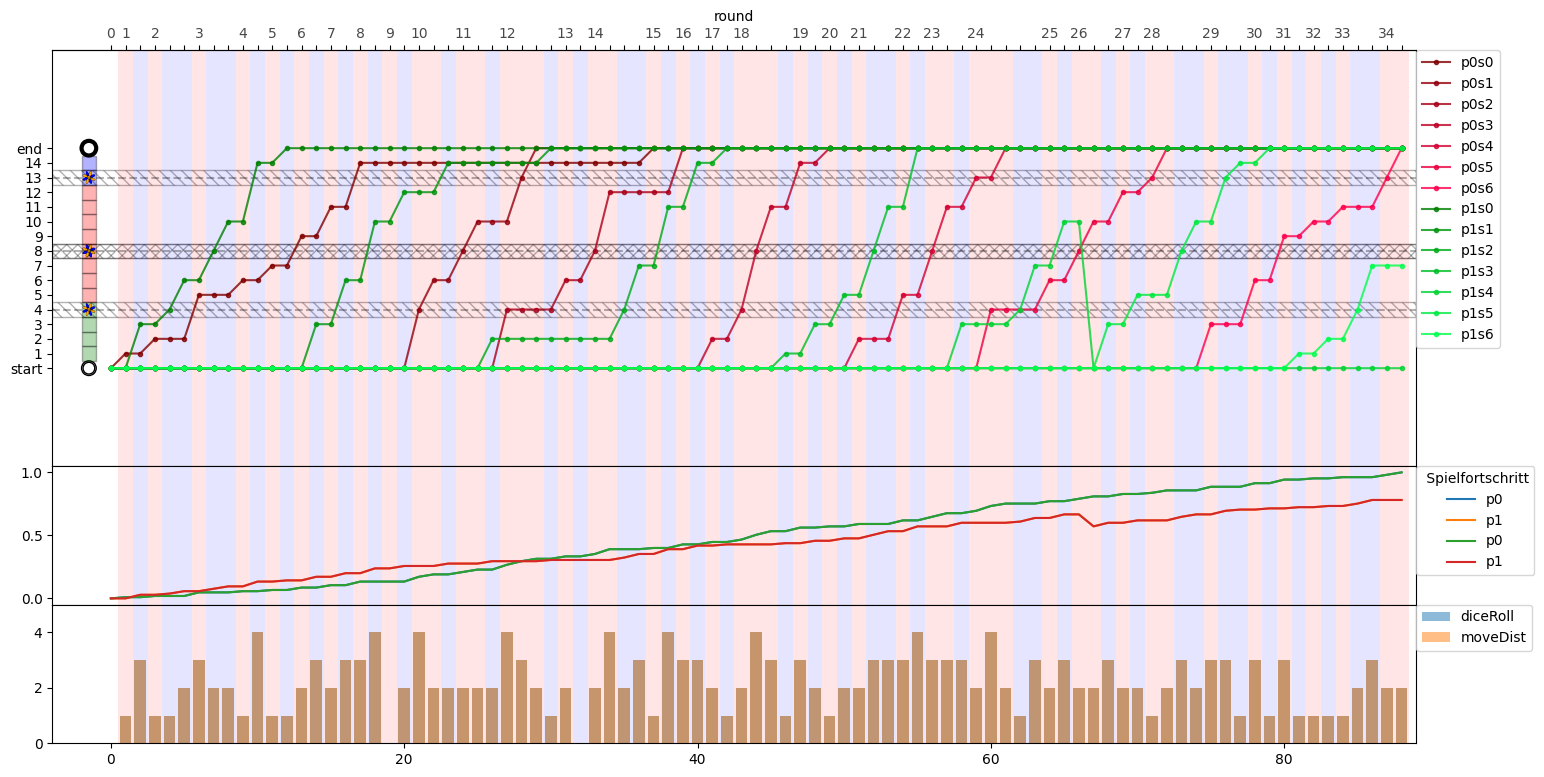

In [ ]:
historyID = 2
currGame = h[historyID][interestingGames[historyID][lengthCase]]
drawGame(currGame, True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


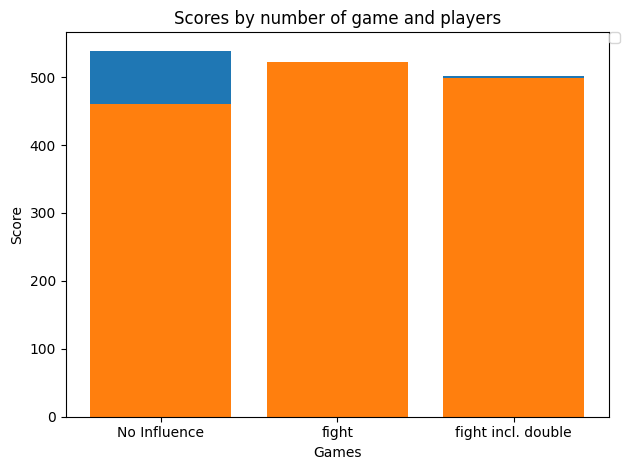

In [ ]:
def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


xlabels = ['No Influence', 'fight', 'fight incl. double']
player0 = [[[p.getID() for p in g["winner"]]for g in s].count([0])for s in h]
player1 = [[[p.getID() for p in g["winner"]]for g in s].count([1])for s in h]

fig, ax = plt.subplots()
# hat_graph(ax, xlabels, [player0, player1], ['Player 0', 'Player 1'])

ax.bar(xlabels,player0)
ax.bar(xlabels,player1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_title('Scores by number of game and players')
ax.legend( bbox_to_anchor=(1, 1),
          loc='upper left', borderaxespad=0.)

fig.tight_layout()
plt.show()


In [ ]:
currGame["history"]["newRound"]
currGame["history"]["roundID"]
currGame["winner"]
h[0][0]["winner"]

   
[[[p.getID() for p in g["winner"]]for g in s].count([0])for s in h]
[[[p.getID() for p in g["winner"]]for g in s].count([1])for s in h]
# {p: [np.sum([currGame["history"]["stones"][p][stone][step]for stone in currGame["history"]["stones"][p]])/(15*7) for step in currGame["history"]["globalStepID"]]for p in currGame["history"]["stones"]}


[461, 522, 498]

In [ ]:
game_length = 14

current_pos = -1

step_count = 0



while current_pos <= game_length:
       step_count += 1
       for i in range(current_pos):
              print(" ", end='')
       print("┠", end='')
       move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
       for i in range(move_dist-1):
              print("─", end='')
       print("┨ "+ str(move_dist) )

       current_pos+= move_dist

       print("┠╂", end='')
       for i in range(game_length-1):
              print("┬", end='')
       print("╂┨ "+str(current_pos))
       for i in range(current_pos):
              print(" ", end='')
       print("┃")

 


┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 1
 ┃
 ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 3
   ┃
   ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 5
     ┃
     ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 6
      ┃
      ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 7
       ┃
       ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 8
        ┃
        ┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 8
        ┃
        ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 10
          ┃
          ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 12
            ┃
            ┠──┨ 3
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 15
               ┃
